In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Dataset Link -> https://archive.ics.uci.edu/

# About Data Set
# Each Row is one -> Data Point / Example / sample / item
# Each sample has quality / value for every labels
# And at the end they have a class (gamam,hadron) -> On the basis of quality or value of each sample

# Objective -> We have to predict Class for Future Samples -> Wheather it is Gamma or Hadron -> Target of Our Feature Vector
# ---> Known as Classification

In [3]:
# set Labels to Dataset -> 10 Diff Features
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df['class'].unique()

# We have char data in column class
# Convert it to number. By converting  g -> 1 and h -> 0

df['class'] = (df['class'] == 'g').astype(int)
# if true (g) then 1 else 0
# Computer is good at understanding numbers

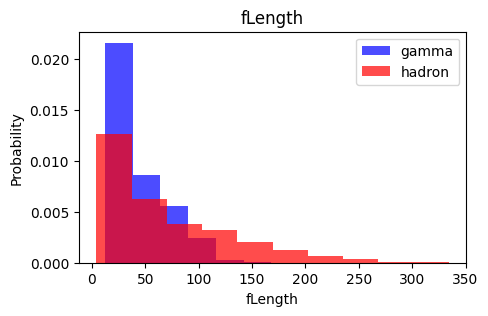

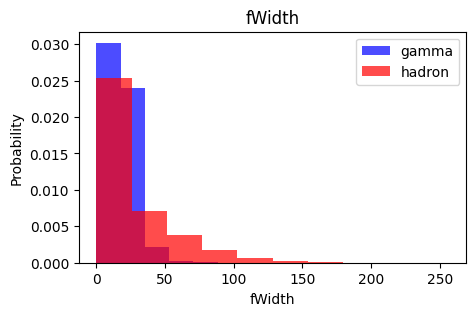

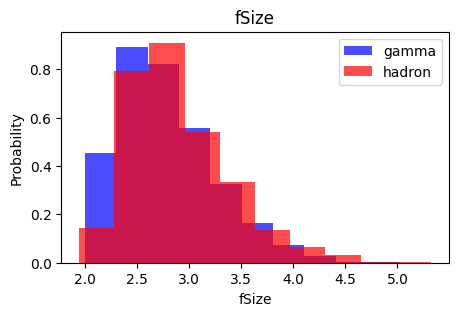

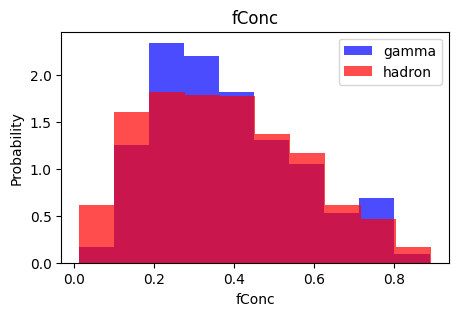

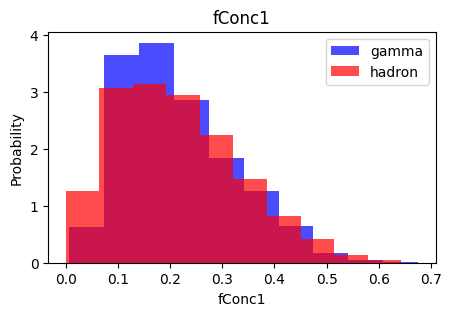

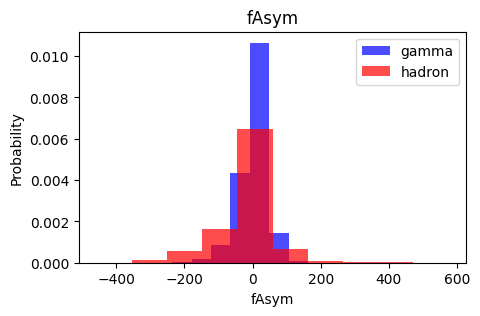

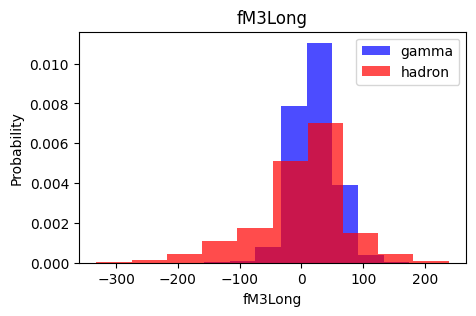

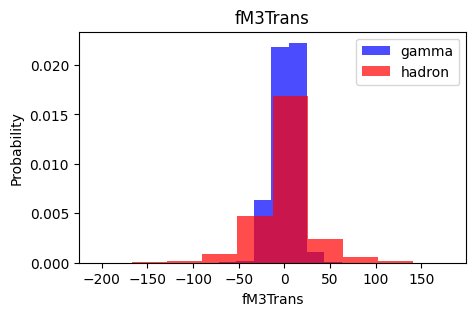

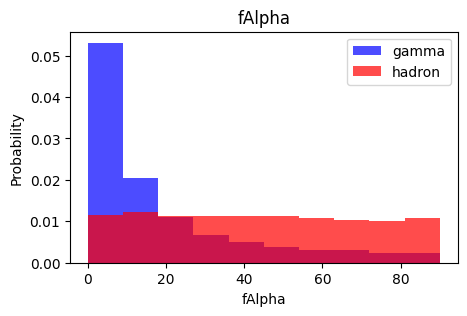

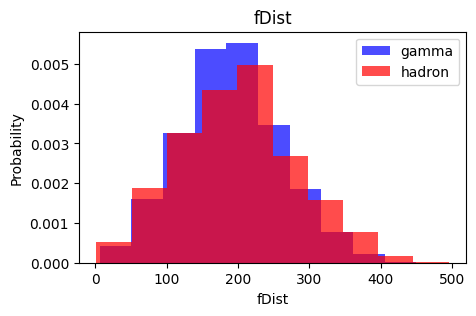

In [5]:
# Histogram helps us to predict the probability of getting Future Data in or near to certain Value or Number
for label in cols[:-1]:
    plt.figure(figsize=(5,3))
    plt.hist(df[df['class']==1][label], color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show() 

In [6]:
# Creating Train, Validation, Test datasets
# Split -> To split Data
# sample: Randomly picks rows from your DataFrame.
# frac=1: Tells Pandas to return 100% of the rows.
# First Cut at 60% then 80%

# This Changing dataframe to matrices 
# train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# Create the indices first
shuffled = df.sample(frac=1)
i, j = int(0.6*len(df)), int(0.8*len(df))

# Slice directly using Pandas .iloc (keeps them as DataFrames!)
train, valid, test = shuffled.iloc[:i], shuffled.iloc[i:j], shuffled.iloc[j:]


In [7]:
print(len(train[train['class']==1])) # Gamma
print(len(train[train['class']==0])) # hadron

# huge difference between Gamma (7360) and Hadron (4052)
# This is an Issue -> So we Need to oversample our dataset with hadron 

7396
4016


In [8]:
# naming Convension that we prefer
# x -> Scalar or Vector	One single data point / One row.
# X -> Matrix	The whole dataset / All rows.
# y -> 	Vector	The targets (labels) for every row in X.

def scale_dataset(dataframe, oversample = False):
    # Upto last - 1 Column
    X = dataframe[dataframe.columns[:-1]].values
    # Last Column -> y (Output / Target)
    y = dataframe[dataframe.columns[-1]].values
    
    # We need our data in similar scale.    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Take More Rows of less class dataset(hadron) and keep sampling until both have similar or equal length
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    # Create a single matrix with Feature and output of All data (Rows to Matrix) Then -> (vector to matrix)
    # [a, b, c]   [y]                       |a, b, c, y|
    # [a, b, c]   [y]     ---> To --->      |a, b, c, y|
    # [a, b, c]   [y]                       |a, b, c, y|
    data = np.hstack((X, np.reshape(y, (-1,1)))) # -1 -> len(y)   
    
    return data, X, y
    

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)

# We Should not do the Over Sample the validation and test Dataset
# It Cannot affect our Model
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# print(sum(y_train == 1)) # 7366
# print(sum(y_train == 0)) # 7366

In [10]:
# ************** KNN ***************

from sklearn.neighbors import KNeighborsClassifier # Because We are classifying
from sklearn.metrics import classification_report

In [ ]:
# Train KNN Model -> Pass Features and Target Matrix

knn_model = KNeighborsClassifier(n_neighbors = 1) # Pass No. of neighbours we want to use
knn_model.fit(X_train, y_train)


# Predict Output class on Test Dataset

y_prediction = knn_model.predict(X_test)

# Generate Classification report
# Comparision between actual and Prediction of our model
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1362
           1       0.83      0.89      0.86      2442

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [12]:
# ***************** Naive Bayes *********************

from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)


y_prediction = nb_model.predict(X_test)


print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1362
           1       0.73      0.90      0.80      2442

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804

